# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *mlp.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.

## Note: you will deal with a lot of different types data in this exercise! For quick inspection and easier debugging (including when you need to ask a TA for help) use the Spyder IDE and its Variable explorer tab.

##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function imshow() to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


In [3]:
import seaborn as sn
import pandas as pd
import numpy as np

def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

Assignment by

Ellen Schrader s4693949
Jelle Piepenbrock s4244729

*Double click to type your answer for 6.1.1 here:*

We used test sets, we were not sure whether the exercise was wanting us to use the training set and causing the classifier to predict everything perfectly with neighbours = 1 (because then the sample is its own nearest neighbour in the set). 

The best settings (we tested from 1-20 neigbors):

For dataset 1:

Euclidean distance - 2 neighbors

Dataset 2:

Euclidean distance - 1 neighbor

Dataset 3:

Cityblock distance - 1 neighbor

Dataset 3

Euclidean distance - 20 neighbors

When clusters are well separated, it makes sense to use a lower neighbor setting, because then it is right most of the time. For overlapping clusters, you make a kind of 'weighted' guess by including more neighbors (as can be seen from the result in dataset 4.)


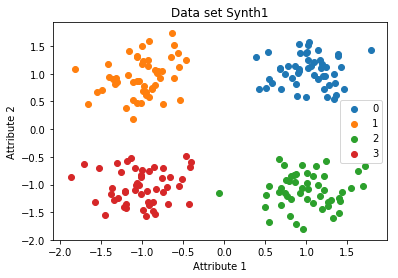

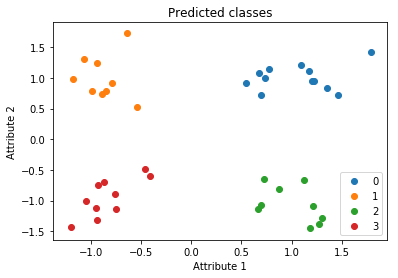

the accuracy score is: 1.0 the error is: 0.0
The best number of neighbours: 1 using euclidean distance


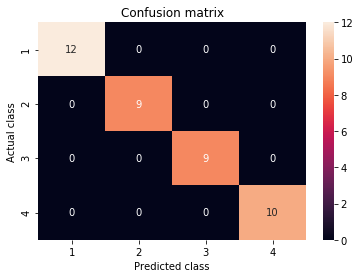

In [4]:
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
% matplotlib inline
synth1 = loadmat('Data/synth1.mat')
X1 = synth1['X']
y1 = synth1['y'].ravel()

X1_a = X1[np.where(y1==0)]
X1_b = X1[np.where(y1==1)]
X1_c = X1[np.where(y1==2)]
X1_d = X1[np.where(y1==3)]

plt.scatter(X1_a[:,0], X1_a[:,1], label ='0')
plt.scatter(X1_b[:,0], X1_b[:,1], label ='1')
plt.scatter(X1_c[:,0], X1_c[:,1], label = '2')
plt.scatter(X1_d[:,0], X1_d[:,1], label = '3')

plt.title('Data set Synth1')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.legend()
plt.show()

X1_test = synth1['X_test']
X1_train = synth1['X_train']
y1_train = synth1['y_train'].ravel()
y1_test = synth1['y_test'].ravel()
best=[0,0]
for i in range(1,21):
    neigh1= KNeighborsClassifier(n_neighbors = i, p=2)
    neigh1.fit(X1_train, y1_train)
    pred1= neigh1.predict(X1_test)
    if accuracy_score(y1_test,pred1)>best[1] :
        best=[i,float(accuracy_score(y1_test,pred1))] 
        
        
neigh1 = KNeighborsClassifier(n_neighbors = best[0], p=2)
neigh1.fit(X1_train, y1_train)
pred1= neigh1.predict(X1_test)

        
X1_ta = X1_test[np.where(pred1==0)]
X1_tb = X1_test[np.where(pred1==1)]
X1_tc = X1_test[np.where(pred1==2)]
X1_td = X1_test[np.where(pred1==3)]


plt.scatter(X1_ta[:,0], X1_ta[:,1], label ='0')
plt.scatter(X1_tb[:,0], X1_tb[:,1], label ='1')
plt.scatter(X1_tc[:,0], X1_tc[:,1], label ='2')
plt.scatter(X1_td[:,0], X1_td[:,1], label ='3')

plt.legend()
plt.title('Predicted classes')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')   


plt.show()
print 'the accuracy score is:', best[1], 'the error is:', 1-best[1]
print 'The best number of neighbours:', best[0], 'using euclidean distance'
confmat1= confusion_matrix(y1_test, pred1)
plot_confusion_matrix(confmat1,y1)




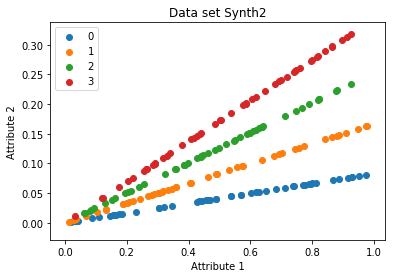

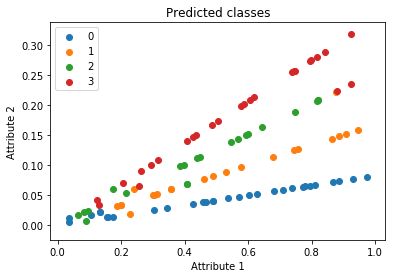

the accuracy score is: 0.84 the error is: 0.16
The best number of neighbours: 1 using euclidean distance


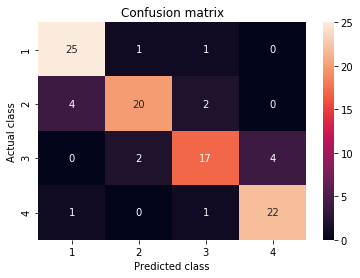

In [5]:
synth2 = loadmat('Data/synth2.mat')
X2 = synth2['X']
y2 = synth2['y'].ravel()

X2_a = X2[np.where(y2==0)]
X2_b = X2[np.where(y2==1)]
X2_c = X2[np.where(y2==2)]
X2_d = X2[np.where(y2==3)]

plt.scatter(X2_a[:,0], X2_a[:,1], label ='0')
plt.scatter(X2_b[:,0], X2_b[:,1], label ='1')
plt.scatter(X2_c[:,0], X2_c[:,1], label = '2')
plt.scatter(X2_d[:,0], X2_d[:,1], label = '3')

plt.title('Data set Synth2')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.legend()
plt.show()

X2_test = synth2['X_test']
X2_train = synth2['X_train']
y2_train = synth2['y_train'].ravel()
y2_test = synth2['y_test'].ravel()
best=[0,0]
for i in range(1,21):
    neigh2= KNeighborsClassifier(n_neighbors = i, p=2)
    neigh2.fit(X2_train, y2_train)
    pred2= neigh2.predict(X2_test)
    if accuracy_score(y2_test,pred2)>best[1] :
        best=[i,float(accuracy_score(y2_test,pred2))] 
        
        
neigh2 = KNeighborsClassifier(n_neighbors = best[0], p=2)
neigh2.fit(X2_train, y2_train)
pred2= neigh2.predict(X2_test)

        
X2_ta = X2_test[np.where(pred2==0)]
X2_tb = X2_test[np.where(pred2==1)]
X2_tc = X2_test[np.where(pred2==2)]
X2_td = X2_test[np.where(pred2==3)]


plt.scatter(X2_ta[:,0], X2_ta[:,1], label ='0')
plt.scatter(X2_tb[:,0], X2_tb[:,1], label ='1')
plt.scatter(X2_tc[:,0], X2_tc[:,1], label ='2')
plt.scatter(X2_td[:,0], X2_td[:,1], label ='3')

plt.legend()
plt.title('Predicted classes')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')   


plt.show()
print 'the accuracy score is:', best[1], 'the error is:', 1-best[1]
print 'The best number of neighbours:', best[0], 'using euclidean distance'
confmat2= confusion_matrix(y2_test, pred2)
plot_confusion_matrix(confmat2,y2)

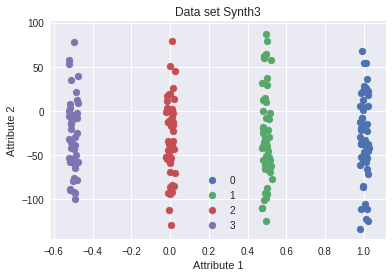

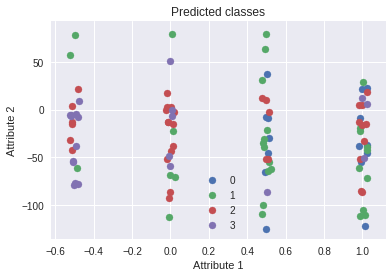

the accuracy score is: 0.45 the error is: 0.55
The best number of neighbours: 1 using cityblock distance


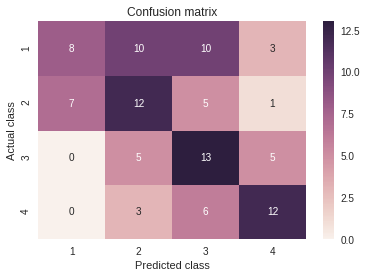

In [5]:
synth3 = loadmat('Data/synth3.mat')
X3 = synth3['X']
y3 = synth3['y'].ravel()

X3_a = X3[np.where(y3==0)]
X3_b = X3[np.where(y3==1)]
X3_c = X3[np.where(y3==2)]
X3_d = X3[np.where(y3==3)]

plt.scatter(X3_a[:,0], X3_a[:,1], label ='0')
plt.scatter(X3_b[:,0], X3_b[:,1], label ='1')
plt.scatter(X3_c[:,0], X3_c[:,1], label = '2')
plt.scatter(X3_d[:,0], X3_d[:,1], label = '3')

plt.title('Data set Synth3')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.legend()
plt.show()

X3_test = synth3['X_test']
X3_train = synth3['X_train']
y3_train = synth3['y_train'].ravel()
y3_test = synth3['y_test'].ravel()
best=[0,0]
for i in range(1,21):
    neigh3= KNeighborsClassifier(n_neighbors = i, p=1)
    neigh3.fit(X3_train, y3_train)
    pred3= neigh3.predict(X3_test)
    if accuracy_score(y3_test,pred3)>best[1] :
        best=[i,float(accuracy_score(y3_test,pred3))] 
        
        
neigh3 = KNeighborsClassifier(n_neighbors = best[0], p=1)
neigh3.fit(X3_train, y3_train)
pred3= neigh3.predict(X3_test)

        
X3_ta = X3_test[np.where(pred3==0)]
X3_tb = X3_test[np.where(pred3==1)]
X3_tc = X3_test[np.where(pred3==2)]
X3_td = X3_test[np.where(pred3==3)]


plt.scatter(X3_ta[:,0], X3_ta[:,1], label ='0')
plt.scatter(X3_tb[:,0], X3_tb[:,1], label ='1')
plt.scatter(X3_tc[:,0], X3_tc[:,1], label ='2')
plt.scatter(X3_td[:,0], X3_td[:,1], label ='3')

plt.legend()
plt.title('Predicted classes')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')   


plt.show()
print 'the accuracy score is:', best[1], 'the error is:', 1-best[1]
print 'The best number of neighbours:', best[0], 'using cityblock distance'
confmat3= confusion_matrix(y3_test, pred3)
plot_confusion_matrix(confmat3,y3)

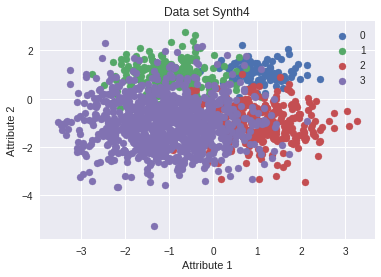

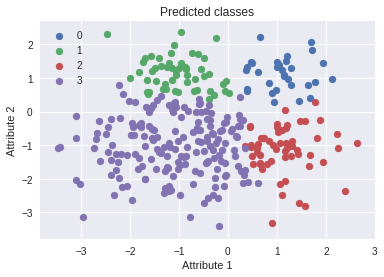

the accuracy score is: 0.828125 the error is: 0.171875
The best number of neighbours: 20 using euclidean distance


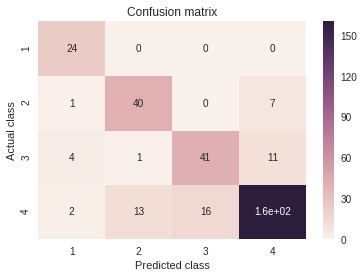

In [6]:
synth4 = loadmat('Data/synth4.mat')
X4 = synth4['X']
y4 = synth4['y'].ravel()

X4_a = X4[np.where(y4==0)]
X4_b = X4[np.where(y4==1)]
X4_c = X4[np.where(y4==2)]
X4_d = X4[np.where(y4==3)]

plt.scatter(X4_a[:,0], X4_a[:,1], label ='0')
plt.scatter(X4_b[:,0], X4_b[:,1], label ='1')
plt.scatter(X4_c[:,0], X4_c[:,1], label = '2')
plt.scatter(X4_d[:,0], X4_d[:,1], label = '3')

plt.title('Data set Synth4')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.legend()
plt.show()

X4_test = synth4['X_test']
X4_train = synth4['X_train']
y4_train = synth4['y_train'].ravel()
y4_test = synth4['y_test'].ravel()
best=[0,0]
for i in range(1,21):
    neigh4= KNeighborsClassifier(n_neighbors = i, p=2)
    neigh4.fit(X4_train, y4_train)
    pred4= neigh4.predict(X4_test)
    if accuracy_score(y4_test,pred4)>best[1] :
        best=[i,float(accuracy_score(y4_test,pred4))] 
        
        
neigh4 = KNeighborsClassifier(n_neighbors = best[0], p=2)
neigh4.fit(X4_train, y4_train)
pred4= neigh4.predict(X4_test)

        
X4_ta = X4_test[np.where(pred4==0)]
X4_tb = X4_test[np.where(pred4==1)]
X4_tc = X4_test[np.where(pred4==2)]
X4_td = X4_test[np.where(pred4==3)]


plt.scatter(X4_ta[:,0], X4_ta[:,1], label ='0')
plt.scatter(X4_tb[:,0], X4_tb[:,1], label ='1')
plt.scatter(X4_tc[:,0], X4_tc[:,1], label ='2')
plt.scatter(X4_td[:,0], X4_td[:,1], label ='3')

plt.legend()
plt.title('Predicted classes')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')   


plt.show()
print 'the accuracy score is:', best[1], 'the error is:', 1-best[1]
print 'The best number of neighbours:', best[0], 'using euclidean distance'
confmat4= confusion_matrix(y4_test, pred4)
plot_confusion_matrix(confmat4,y4)

#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

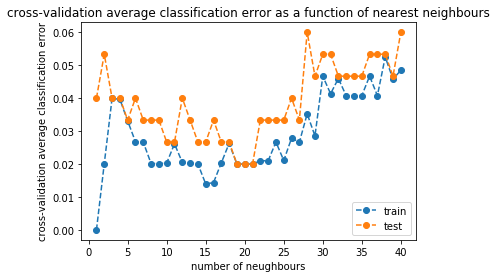

In [121]:
from pandas import read_excel
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
iris= read_excel('Data/iris.xls')
iris.head()
loo = LeaveOneOut()

train_err_gen = []
test_err_gen = []
X = iris[iris.columns[:4]].values
y = iris[iris.columns[4]].values

for k in range(1,41):
    
    neigh= KNeighborsClassifier(n_neighbors = k)
    train_err_list = []
    test_err_list  = []
    
    
    for train, test in loo.split(X):
        neigh.fit(X[train], y[train])
        train_accuracy = accuracy_score(y[train], neigh.predict(X[train]))
        test_accuracy = accuracy_score(y[test], neigh.predict(X[test]))

        train_err_list.append(1 - train_accuracy)
        test_err_list.append(1 - test_accuracy)
        
    train_err_gen.append(train_err_list)
    test_err_gen.append(test_err_list)
    
train_err = np.stack([np.asarray(k) for k in train_err_gen])
test_err  = np.stack([np.asarray(k) for k in test_err_gen])
train_mean = np.mean(train_err, axis = 1)
test_mean = np.mean(test_err, axis = 1)


# Plot 
plt.plot(range(1,41),train_mean, '--o', label='train')
plt.plot(range(1,41),test_mean, '--o', label='test')
plt.legend()
plt.title('cross-validation average classification error as a function of nearest neighbours')
plt.xlabel('number of neughbours')
plt.ylabel('cross-validation average classification error')
plt.show()


#### Answer:
The optimal number of neigbours is 20 (see graph)


#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

Text(0,0.5,u'mean squared error prediction and alcohol')

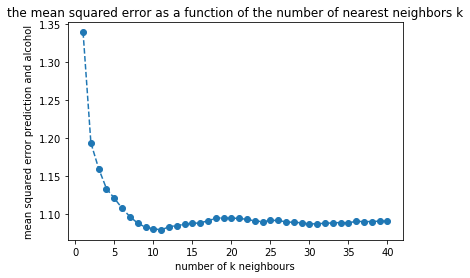

In [6]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
wine = loadmat('Data/wine.mat')

X=wine['X'][:,:10]
alcohol=wine['X'][:,10].ravel()
err_gen = []


for k in range(1,41):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X) 
    nearestNeigh = neigh.kneighbors(return_distance=False)
    matrix= np.array(alcohol[nearestNeigh])
    pred= [np.mean(x) for x in matrix]
    err_gen.append(mean_squared_error(alcohol,pred))

plt.plot(range(1,41),err_gen, '--o')
plt.title('the mean squared error as a function of the number of nearest neighbors k')
plt.xlabel('number of k neighbours')
plt.ylabel('mean squared error prediction and alcohol')

### Answer:
The optimal number of nearest neighbours is 11 (see figure above) as the mean squared error has the smallest vaues for 11.

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class MLP contained in the `mlp.py` file can be used to create a Multilayer Perceptron that can learn weights that minimize $W = \{W_o,W_h\}$ the objective function $E(X,y,(W_o,W_h)) = \sum_i (f(W_o*f(W_h*X_i)) - y_i)$ for any dataset X with corresponding labels y. We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the MLP class in the Toolbox and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single layer perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is the sigmoid function. Why does it not make sense for an MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?

>It does not makes sense to use a linear activation function for a MLP as this only makes it possible to solve linear problems. The multilayer perceptron without a non-linear activation can be rewritten as a single linear matrix multiplication. So, using a linear function a neural network even with many hidden layers, is effectively the same as using a single layer perceptron. As summing the outcome of the different layers can be described in a linear function.

2. The function that learns the weights W mentioned above is the function `learn_weights()` which has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `nhidden`: number of units in hidden layer - more units will allow the MLP to learn more complicated functions, but it also makes it easier for the MLP to overfit (memorize) the training set.

> `nepochs`: number of learning steps - more epochs allow the MLP to converge to a function that better captures the relation in the dataset. Again, there is a danger of overfitting if you use too many epochs.

> `eta`: learning rate - this is effectively the step size that is used when following the error gradient to minimize the loss function during gradient descent. A larger learning rate could increase convergence, but when the rate is too high, you could be 'bouncing' around a minimum in the loss landscape. A learning rate that is too low will take more time to converge.

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1]).reshape(4,1)`
     
   The command `perceptron = mlp.MLP(Xtest,ytest)` will create a instance of the MLP class. Now you can learn the weights for one hidden unit by using `wh,wo,c = perceptron.learn_weights()`. What are the weights after learning? And the classification error? use the function `perceptron.plot_boundaries(wh,wo,Xtest)` to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

##### NOTE: the weights are initiated randomly -- if the result looks strange, it may help to run the learning process again.

Iteration: 0 / 8000 ; misclassication rate: 0.2500
Iteration: 500 / 8000 ; misclassication rate: 0.2500
Iteration: 1000 / 8000 ; misclassication rate: 0.0000
Iteration: 1500 / 8000 ; misclassication rate: 0.0000
Iteration: 2000 / 8000 ; misclassication rate: 0.0000
Iteration: 2500 / 8000 ; misclassication rate: 0.0000
Iteration: 3000 / 8000 ; misclassication rate: 0.0000
Iteration: 3500 / 8000 ; misclassication rate: 0.0000
Iteration: 4000 / 8000 ; misclassication rate: 0.0000
Iteration: 4500 / 8000 ; misclassication rate: 0.0000
Iteration: 5000 / 8000 ; misclassication rate: 0.0000
Iteration: 5500 / 8000 ; misclassication rate: 0.0000
Iteration: 6000 / 8000 ; misclassication rate: 0.0000
Iteration: 6500 / 8000 ; misclassication rate: 0.0000
Iteration: 7000 / 8000 ; misclassication rate: 0.0000
Iteration: 7500 / 8000 ; misclassication rate: 0.0000
Final misclassification rate: 0.0000
w_h: [[ 4.80941458 -4.89470014 -4.89470085]] w_o: [[-6.16746129]] classification error: 0.0


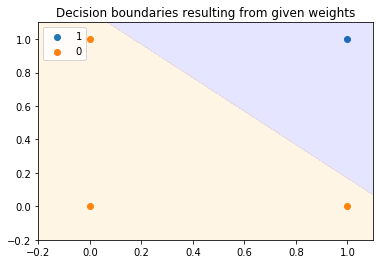

In [7]:
import mlp
Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])
ytest = np.array([0,0,0,1]).reshape(4,1)
perceptron = mlp.MLP(Xtest,ytest)
wh,wo,c = perceptron.learn_weights()
print 'w_h:',wh,'w_o:',wo,'classification error:',c
perceptron.plot_boundaries(wh,wo,Xtest)

*Double click to type your answer for 6.2.1 here:*

This classification does work well with one hidden unit, because there is a linear decision boundary that can be made to predict the classes of the data set. This is the simplest model that fits the data set, so 'improving' by adding more nodes is not neccessarily useful.

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make a scatter plot of the two attributes in `X`, coloring the points according to the class label `y`. How are `X` and `y` related?

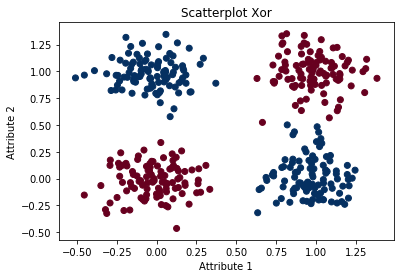

In [9]:
xor = loadmat('Data/xor.mat')
X= xor['X']
y= xor['y'].ravel()
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu')
plt.title('Scatterplot Xor')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.show()


*Double click to type your answer for 6.2.2 here:*

X and Y are related by a non-linear exclusive or (XOR) relationship.

You will now use the MLP class to create and learn the weights of a mlp. The constructor `mlp.MLP(X,y)` takes 2 arguments, X and y. Save the instance you created in a variable `perceptron`. The function `learn_weights()` will return the weights between the input layer and hidden layer, `W_h`, the weights between the hidden layer and the output layer, `W_o`, and the classification error  


#### 6.2.3 (2 points)
Create a MLP using X and y. Learn the weights `Wh,Wo` using 1 hidden unit. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. Since the algorithm doesn't always converge, restart the learning process 5 times in each fold and take the best classification error.  

You can get the training error from the `learn_weights()` function. Set the optional parameter `verbose=False` to prevent cluttering the output with print statements. The test error can be obtained by feeding the test data through the network using the function `forwardprop(W_h,W_o,X=X_test)`. `forwardprop` will then return a few variables (h,o,grad_h,grad_o, and y_hat), of which the last is the output of the network. You can compare this output `y_hat` to the actual labels in `y_test`. So:

>`_,_,_,_,y_hat = perceptron.forwardprop(Wh,Wo,X=X_test)
> test_error = ... #compare y_hat to y_test`




Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

In [10]:
#First we used class_err function from the MLP class to compare y_hat and y_test.
#However the errors where to big and didn't explain the decision boundaries. 
#Therefore we decided to use the accuracy_score to calculate the classification error.
#We were wondering what the problem with the class_err function is or if we used it wrong. We would very appreciate an answer:) 


from sklearn.model_selection import KFold
X= xor['X']
y= xor['y']
test_error=1
train_error=1
kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_error=1
    train_error=1
    for i in range(0,5):
        perceptron = mlp.MLP(X_train,y_train)
        wh,wo,c = perceptron.learn_weights(verbose=False, eta=0.1)
        
        _,_,_,_,y_hat = perceptron.forwardprop(wh,wo,X=X_test)
        if  (1-accuracy_score(y_test, y_hat.T))<test_error:
            test_error =1-accuracy_score(y_test, y_hat.T)
            train_error =c
    print 'test error', test_error, 'train error:', train_error
        

        


test error 0.15 train error: 0.269444444444
test error 0.225 train error: 0.255555555556
test error 0.225 train error: 0.255555555556
test error 0.25 train error: 0.252777777778
test error 0.15 train error: 0.266666666667
test error 0.225 train error: 0.261111111111
test error 0.225 train error: 0.263888888889
test error 0.25 train error: 0.261111111111
test error 0.225 train error: 0.255555555556
test error 0.25 train error: 0.252777777778


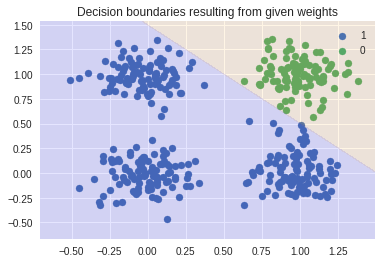

In [11]:
X= xor['X']
y= xor['y']
perceptron = mlp.MLP(X,y)
wh,wo,c = perceptron.learn_weights(verbose=False)
perceptron.plot_boundaries(wh,wo,X)

*Double click to type your answer for 6.2.3 here:*

The MLP with only one neuron performs poorly because it can only make one, linear boundary in the data space. Because the relationship in the data is a non-linear XOR relationship, this is not enough to effectively fit the data.

#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

In [12]:
from sklearn.metrics import accuracy_score
X= xor['X']
y= xor['y']
kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_error=1
    train_error=1
    for i in range(0,5):
        perceptron = mlp.MLP(X_train,y_train)
        wh,wo,c = perceptron.learn_weights(verbose=False,nhidden=2)
        _,_,_,_,y_hat = perceptron.forwardprop(wh,wo,X=X_test)
        
        if (1-accuracy_score(y_test, y_hat.T))<test_error:
            test_error = 1-accuracy_score(y_test, y_hat.T)
            train_error =c
    print 'test error', test_error, 'train error:', train_error
    

test error 0.0 train error: 0.0222222222222
test error 0.0 train error: 0.00555555555556
test error 0.025 train error: 0.00555555555556
test error 0.025 train error: 0.00555555555556
test error 0.0 train error: 0.00555555555556
test error 0.0 train error: 0.00555555555556
test error 0.025 train error: 0.00555555555556
test error 0.025 train error: 0.0111111111111
test error 0.0 train error: 0.00555555555556
test error 0.0 train error: 0.00555555555556


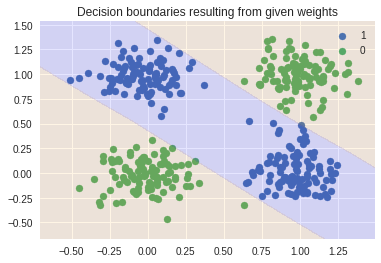

In [14]:
X= xor['X']
y= xor['y']
perceptron = mlp.MLP(X,y)
wh,wo,c = perceptron.learn_weights(verbose=False, nhidden=2)
perceptron.plot_boundaries(wh,wo,X)

*Double click to type your answer for 6.2.4 here:*

The MLP with two hidden units can make two separation lines or boundaries in the data space, which is enough to model the actual XOR relationship in the data.

#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

In [15]:
X= xor['X']
y= xor['y']

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_error=1
    train_error=1
    for i in range(0,5):
        perceptron = mlp.MLP(X_train,y_train)
        wh,wo,c = perceptron.learn_weights(verbose=False, nhidden=10)
        _,_,_,_,y_hat = perceptron.forwardprop(wh,wo,X=X_test)
        
        if (1-accuracy_score(y_test, y_hat.T))<test_error:
            test_error =1-accuracy_score(y_test, y_hat.T)
            train_error =c
print 'test error', test_error, 'train error:', train_error

test error 0.0 train error: 0.0


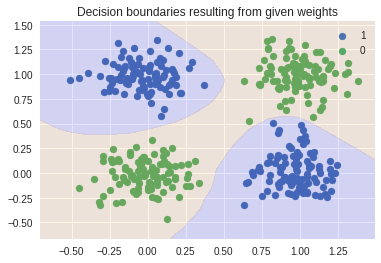

In [16]:
X= xor['X']
y= xor['y']
perceptron = mlp.MLP(X,y)
wh,wo,c = perceptron.learn_weights(verbose=False, nhidden=10)
perceptron.plot_boundaries(wh,wo,X)

*Double click to type your answer for 6.2.5 here:*

The model with 10 hidden units can easily fit the desired non linear XOR relationship, but in fact it has too much capacity: if you look at the decision boundaries, you can see that it has learned a more complicated function than is actually neccessary to get a good generalization performance: it is prone to overfitting the training data.